In [1]:
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.stats import norm
from scipy.optimize import curve_fit 
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak
import pandas as pd
from lmfit.models import GaussianModel, ExponentialModel, \
                         ThermalDistributionModel, StepModel #Modelli vari, l'ultimo è Fermi (o Bose)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def retta(x, a, b):
    return(a*x + b)

In [3]:
data=pd.read_excel("InterCalibrazione.xlsx", sheet_name='batch2' )
display(data)

,ch,val_1,err_stat_1,val_2,err_stat_2,val_3,err_stat_3,val_4,err_stat_4,val_5,err_stat_5,media,std,drift relativo,Drift relativo [%],Range,val_6,err_stat_6
0,0.0,-630.4,1.3,-629.0,1.10,-632.0,1.30,-632.22,0.90,-632.50,1.10,-631.224,0.167332,0.000265,0.026509,L,-632.70,1.12
1,1.0,-590.4,1.1,-590.0,1.20,-586.0,1.30,-589.2,1.30,-589.10,1.00,-588.94,0.130384,0.000221,0.022139,NaN,-591.12,1.31
2,2.0,-2290.9,1.6,-2298.0,1.20,-2298.0,1.20,-2299.4,1.50,-2293.60,1.40,-2295.98,0.178885,0.000078,0.007791,L,-2295.01,1.47
3,3.0,-1413.0,2.0,-1409.1,1.50,-1405.0,1.80,-1414,1.70,-1413.80,1.50,-1410.98,0.212132,0.00015,0.015034,H,-1412.10,1.68
4,4.0,-950.5,1.1,-946.6,1.30,-947.0,1.10,-951,1.20,-949.60,1.00,-948.94,0.114018,0.00012,0.012015,H,-952.76,2.00
5,5.0,-1576.9,2.5,-1584.6,2.00,-1585.0,2.30,-1582.7,2.20,-1583.20,2.40,-1582.48,0.192354,0.000122,0.012155,H,-1582.80,2.90
6,6.0,-1064.1,1.5,-1063.7,1.40,-1062.7,1.60,-1068.1,1.60,-1058.10,1.50,-1063.34,0.083666,0.000079,0.007868,L,-1063.49,1.89
7,7.0,-1576.6,1.9,-1581.1,2.10,-1580.0,2.00,-1578.7,1.80,-1573.70,1.70,-1578.02,0.158114,0.0001,0.01002,H,-1582.58,1.60
8,8.0,-1226.7,2.9,-1229.0,3.00,-1239.3,3.00,-1234.5,3.50,-1235.50,2.30,-1233,0.427785,0.000347,0.034695,H,-1234.51,2.21
9,9.0,-671.3,1.0,-670.9,1.00,-672.1,1.10,-672.9,1.00,-668.02,0.84,-671.044,0.093381,0.000139,0.013916,NaN,-672.83,0.82


In [4]:
peak_cs=data['media'].dropna().drop(13)
peak_cs_err=data['std'].dropna().drop(13)

peak_cs_test=data['val_6'].dropna()
peak_cs_err_test=data['err_stat_6'].dropna()

In [5]:
channel_ref=3
ref_cs=peak_cs[channel_ref]
energia=np.abs(662/ref_cs)
coeff_cal=peak_cs/peak_cs[channel_ref]
print(coeff_cal)

0     0.447366
1     0.417398
2     1.627224
3          1.0
4      0.67254
5     1.121547
6     0.753618
7     1.118386
8     0.873861
9     0.475587
10    0.390225
11    0.609038
12    0.587478
14    1.017775
15    1.421168
Name: media, dtype: object


0    -1.317857
1    -1.664122
2     0.659864
3    -0.666667
4        -1.91
5    -0.110345
6    -0.079365
7        -2.85
8    -0.683258
9    -2.178049
10    -1.74359
11    0.993056
12     3.59375
14    0.550265
15    0.420408
dtype: object


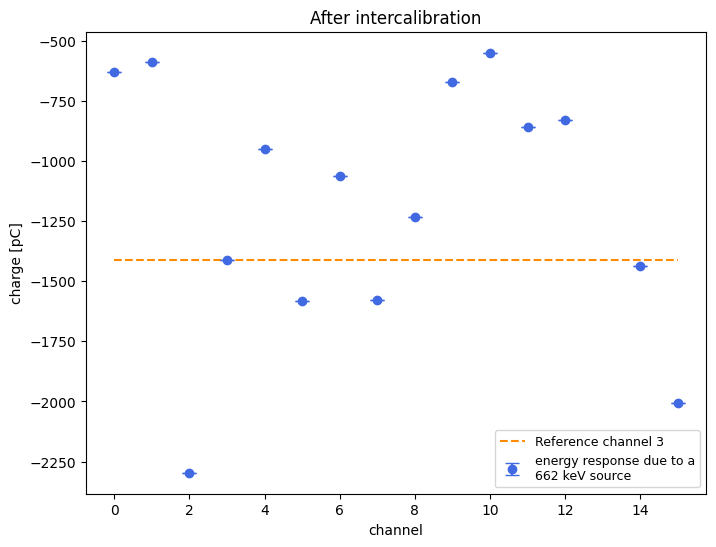

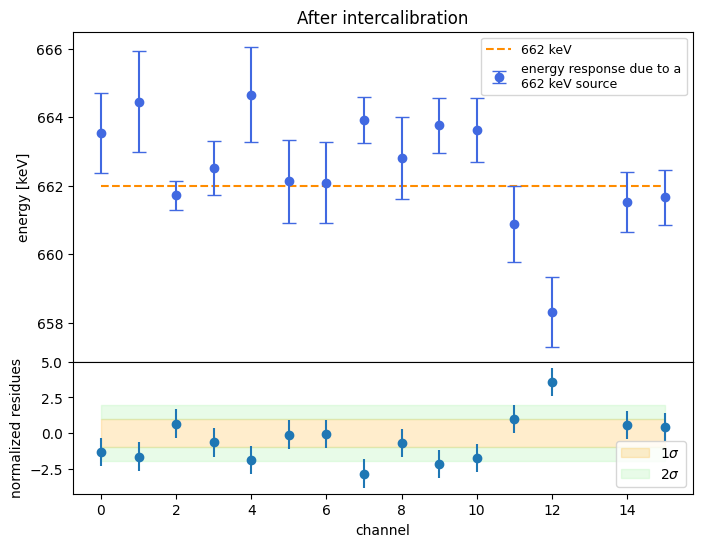

In [6]:
lista=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,14,15])
test_peak_centers=peak_cs_test/coeff_cal

test_peak_errors=peak_cs_err_test/coeff_cal
ref=peak_cs[channel_ref]

plt.figure(figsize=(8,6))
plt.plot(lista, 0*np.array(lista) + ref, color='darkorange', ls='--',label='Reference channel {} '.format(channel_ref))
plt.errorbar(lista, peak_cs, yerr=peak_cs_err, ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
plt.legend(fontsize=9)
plt.title("After intercalibration")
plt.ylabel("charge [pC]")
plt.xlabel('channel')
plt.savefig('bef_int.png')


#######################################################################################################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

print( (test_peak_centers-ref)/test_peak_errors  )
ax1.plot(lista, 0*np.array(lista) + 662, color='darkorange', ls='--', label='662 keV '.format(channel_ref))
ax1.errorbar(lista, test_peak_centers*662/ref, yerr=test_peak_errors*662/np.abs(ref), ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
ax1.legend(fontsize=9)
ax1.set_title("After intercalibration")
ax1.set_ylabel("energy [keV]")

xlim = ax1.get_xlim()
ax2.errorbar(lista,(np.array(test_peak_centers)-ref)/np.array(test_peak_errors), yerr=1, ls=' ', marker='o')
ax2.fill_between([0,15], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between([0,15], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between([0,15], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
ax2.set_xlabel("channel")
ax2.set_ylabel("normalized residues")
ax2.legend()
plt.subplots_adjust(hspace=0)

plt.legend(loc='lower right')
plt.savefig('af_int.png')

In [7]:
[print("{0} & {1} \\".format(j, coeff_cal[j])) for j in lista]


0 & 0.4473656607464316 \
1 & 0.4173978369643794 \
2 & 1.62722363180201 \
3 & 1.0 \
4 & 0.6725396532906207 \
5 & 1.121546726388751 \
6 & 0.7536180527009595 \
7 & 1.118385802775376 \
8 & 0.8738607209173765 \
9 & 0.4755871805411841 \
10 & 0.39022523352563465 \
11 & 0.6090376901160895 \
12 & 0.5874782066365221 \
14 & 1.017774879870728 \
15 & 1.421168266027867 \


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
#creo un dizionario con tutti i picchi per ogni canale
peaks=dict()
err=dict()
energy=dict()
peak_e=np.abs(np.array([-506.734, -461.730, -1673.738, -1085.422, -758.996, -1258.207, -854.866, -1216.707, -948.590, -506.800,
       -437.591, -776.004, -705.231, -1111.193, -1593.873]))
sigma_e=np.array([0.715, 0.789, 0.664, 0.844, 0.620, 1.360, 0.91, 1.116, 0.613, 1.236, 
         0.469, 0.955, 1.196, 1.043, 1.558])
peak_f=np.abs(np.array([-1216.816, -1142.936, -4043.482, -2679.389, -1825.805, -3077.995, -2076.421, -2938.099, -2288.095, -1217.833,
       -1056.445, -1899.582, -1726.943,  -2700.407, -3837.629] ))
sigma_f=np.array([1.615, 1.780, 2.493, 3.325, 1.683, 3.790, 2.369, 3.218, 1.281, 1.511,
        0.967, 2.157, 2.608,  2.604, 4.468])



peaks["ch_0"]=np.abs(np.array([-506.734, -1216.816, -359.830, -1092.329, -1237.615, peak_cs_test[0]])/coeff_cal[0]*energia)
energy["ch_0"]=np.array([511, 1274, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_0"]=np.array([0.715, 1.615, 0.792, 0.888, 0.932, peak_cs_err_test[0]])/coeff_cal[0]*energia

peaks["ch_1"]=np.abs([-461.730, -1142.936, -78.992, -315.134, -1042.832, -1186.104, peak_cs_test[1]])/coeff_cal[1]*energia
energy["ch_1"]=np.abs([511, 1274, 81,  (276.4*0.088+302.85*0.666)/(0.088+0.666) , 1173.2, 1332.5, 662])
err["ch_1"]= np.array([0.789, 1.780, 0.5, 1.049, 0.778, 0.782, peak_cs_err_test[1]])/coeff_cal[1]*energia

peaks["ch_2"]=np.abs([-1673.738, -4043.482, -122.249, -309.287, -1064.259,  -1245.953, -4059.473, 
                      -4612.032, peak_cs_test[2]])/coeff_cal[2]*energia
energy["ch_2"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5,
                 662])
err["ch_2"]=np.array([ 0.664, 2.493, 0.141, 0.226, 2.641, 0.493, 2.224, 2.424, peak_cs_err_test[2]])/coeff_cal[2]*energia


ch=3
peaks["ch_3"]=np.abs([peak_e[ch], peak_f[ch], -75.484, -178.424, -753.299, -703.840, 
                      -2481.343, -2818.145, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_3"]=np.array([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 
                         1173.2, 1332.5, 662])
err["ch_3"]= np.array([sigma_e[ch], sigma_f[ch], 0.708, 0.534, 0.969, 21.606, 1.929, 1.906, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=4
peaks["ch_4"]=np.abs([peak_e[ch], peak_f[ch], -53.037, -125.63, -516.241, -462.6, -1682.396, 
                      -1912.819, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_4"]=np.abs([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 
                       1173.2, 1332.5, 662])
err["ch_4"]= np.array([sigma_e[ch], sigma_f[ch], 0.638, 0.307, 0.510, 6.676, 1.263,1.335, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=5
peaks["ch_5"]= np.abs([peak_e[ch], peak_f[ch], -202.278, -858.808,  -743.503, -2825.912, -3211.982, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_5"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 1173.2, 1332.5,
                 662])
err["ch_5"]=np.array([sigma_e[ch], sigma_f[ch], 1.504, 1.944, 16.012, 1.824, 1.873, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=6
peaks["ch_6"]=np.abs([peak_e[ch], peak_f[ch], -58.804,  -138.291, -534.679, -589.225, -1861.951, 
                      -2116.112, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_6"]=np.array([511, 1274, 30.85, 81,(276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5,
                 662])
err["ch_6"]=np.array([sigma_e[ch], sigma_f[ch], 2.629, 0.771, 29.596, 0.957, 1.456, 2.037, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=7
peaks["ch_7"]=np.abs([peak_e[ch], peak_f[ch], -111.868, -209.736, -739.552, -862.497, -2730.948, -3093.398, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_7"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 
                         1173.2, 1332.5, 662])
err["ch_7"]=np.array([sigma_e[ch], sigma_f[ch], 14.064, 1.772, 9.526, 1.196, 1.469, 1.497, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=8
peaks["ch_8"]=np.abs([peak_e[ch], peak_f[ch], -170.824, -666.152, -2170.299, -2453.222, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_8"]=np.array([511, 1274, 81,  (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_8"]=np.array([sigma_e[ch], sigma_f[ch], 1.117, 1.321, 2.320, 2.595, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=9
peaks["ch_9"]=np.abs([peak_e[ch], peak_f[ch], -98.190, -362.576, -1195.544, -1332.633, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_9"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738),  1173.2, 1332.5, 662])
err["ch_9"]=np.array([sigma_e[ch], sigma_f[ch], 0.283, 0.501, 1.738, 2.593, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=10
peaks["ch_10"]=np.abs([peak_e[ch], peak_f[ch], -79.969, -305.726, -958.436, -1082.134, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_10"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_10"]=np.array([sigma_e[ch], sigma_f[ch], 0.349, 0.854, 0.547, 0.982, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=11
peaks["ch_11"]=np.abs([peak_e[ch], peak_f[ch], -124.268, -511.263, -1620.388, -1838.495, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_11"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_11"]=np.array([sigma_e[ch], sigma_f[ch], 0.508, 2.282, 1.427, 1.351, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=12
peaks["ch_12"]=np.abs([peak_e[ch], peak_f[ch], -133.19, -538.702, -1607.294, -1813.730, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_12"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_12"]=np.array([sigma_e[ch], sigma_f[ch],0.668, 1.556, 2.239, 2.387, peak_cs_err_test[ch]])/coeff_cal[ch]*energia


ch=13
peaks["ch_14"]=np.abs([peak_e[ch], peak_f[ch], -83.928,  -184.194, -777.060, -2464.399, -2790.467, peak_cs_test[ch+1]])/coeff_cal[ch+1]*energia
energy["ch_14"]=np.array([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_14"]=np.abs([sigma_e[ch], sigma_f[ch], 1.30, 0.634, 0.558, 1.811, 2.038, peak_cs_err_test[ch+1]])/coeff_cal[ch+1]*energia

ch=14
peaks["ch_15"]=np.abs([peak_e[ch], peak_f[ch], -112.397, -265.353, -925.429, -1088.382, -3526.869, 
                       -3991.849, peak_cs_test[ch+1]])/coeff_cal[ch+1]*energia
energy["ch_15"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 
                          1173.2, 1332.5,662])
err["ch_15"]=np.array([sigma_e[ch], sigma_f[ch], 0.973, 1.021, 5.45, 1.114, 2.461, 2.509, peak_cs_err_test[ch+1]])/coeff_cal[ch+1]*energia

ch    a     b;      y=ax+b
0 & 0.9487618676138163 $\pm$ 0.011883432991879526 & 38.574952897305785 $\pm$ 10.406792746954995 \
1 & 0.9894156959319388 $\pm$ 0.011725770171055423 & 15.402357650269366 $\pm$ 9.119422857329466 \
2 & 0.9613159719592158 $\pm$ 0.01408700253225004 & 6.999329562363811 $\pm$ 2.466180885720751 \
3 & 0.9877582756977182 $\pm$ 0.004254929863166098 & 3.165165854926377 $\pm$ 1.8498391408918136 \
4 & 0.9976096563050889 $\pm$ 0.007358213676075822 & 6.263125021722431 $\pm$ 3.1082552748566514 \
5 & 1.0060718621926843 $\pm$ 0.005661082025748686 & 3.690701017930951 $\pm$ 4.473050283001126 \
6 & 0.9907008406998313 $\pm$ 0.00977228794437789 & 10.106596835021067 $\pm$ 5.944631658103179 \
7 & 0.9644798262451073 $\pm$ 0.004743339371654031 & 14.622836618193118 $\pm$ 3.7894026153924765 \
8 & 0.9630295810129234 $\pm$ 0.009605988515250715 & 15.113793574297565 $\pm$ 6.501078263557757 \
9 & 0.9561077459513933 $\pm$ 0.01458959383922158 & 17.954999506263405 $\pm$ 5.587303461730738 \
10 & 0

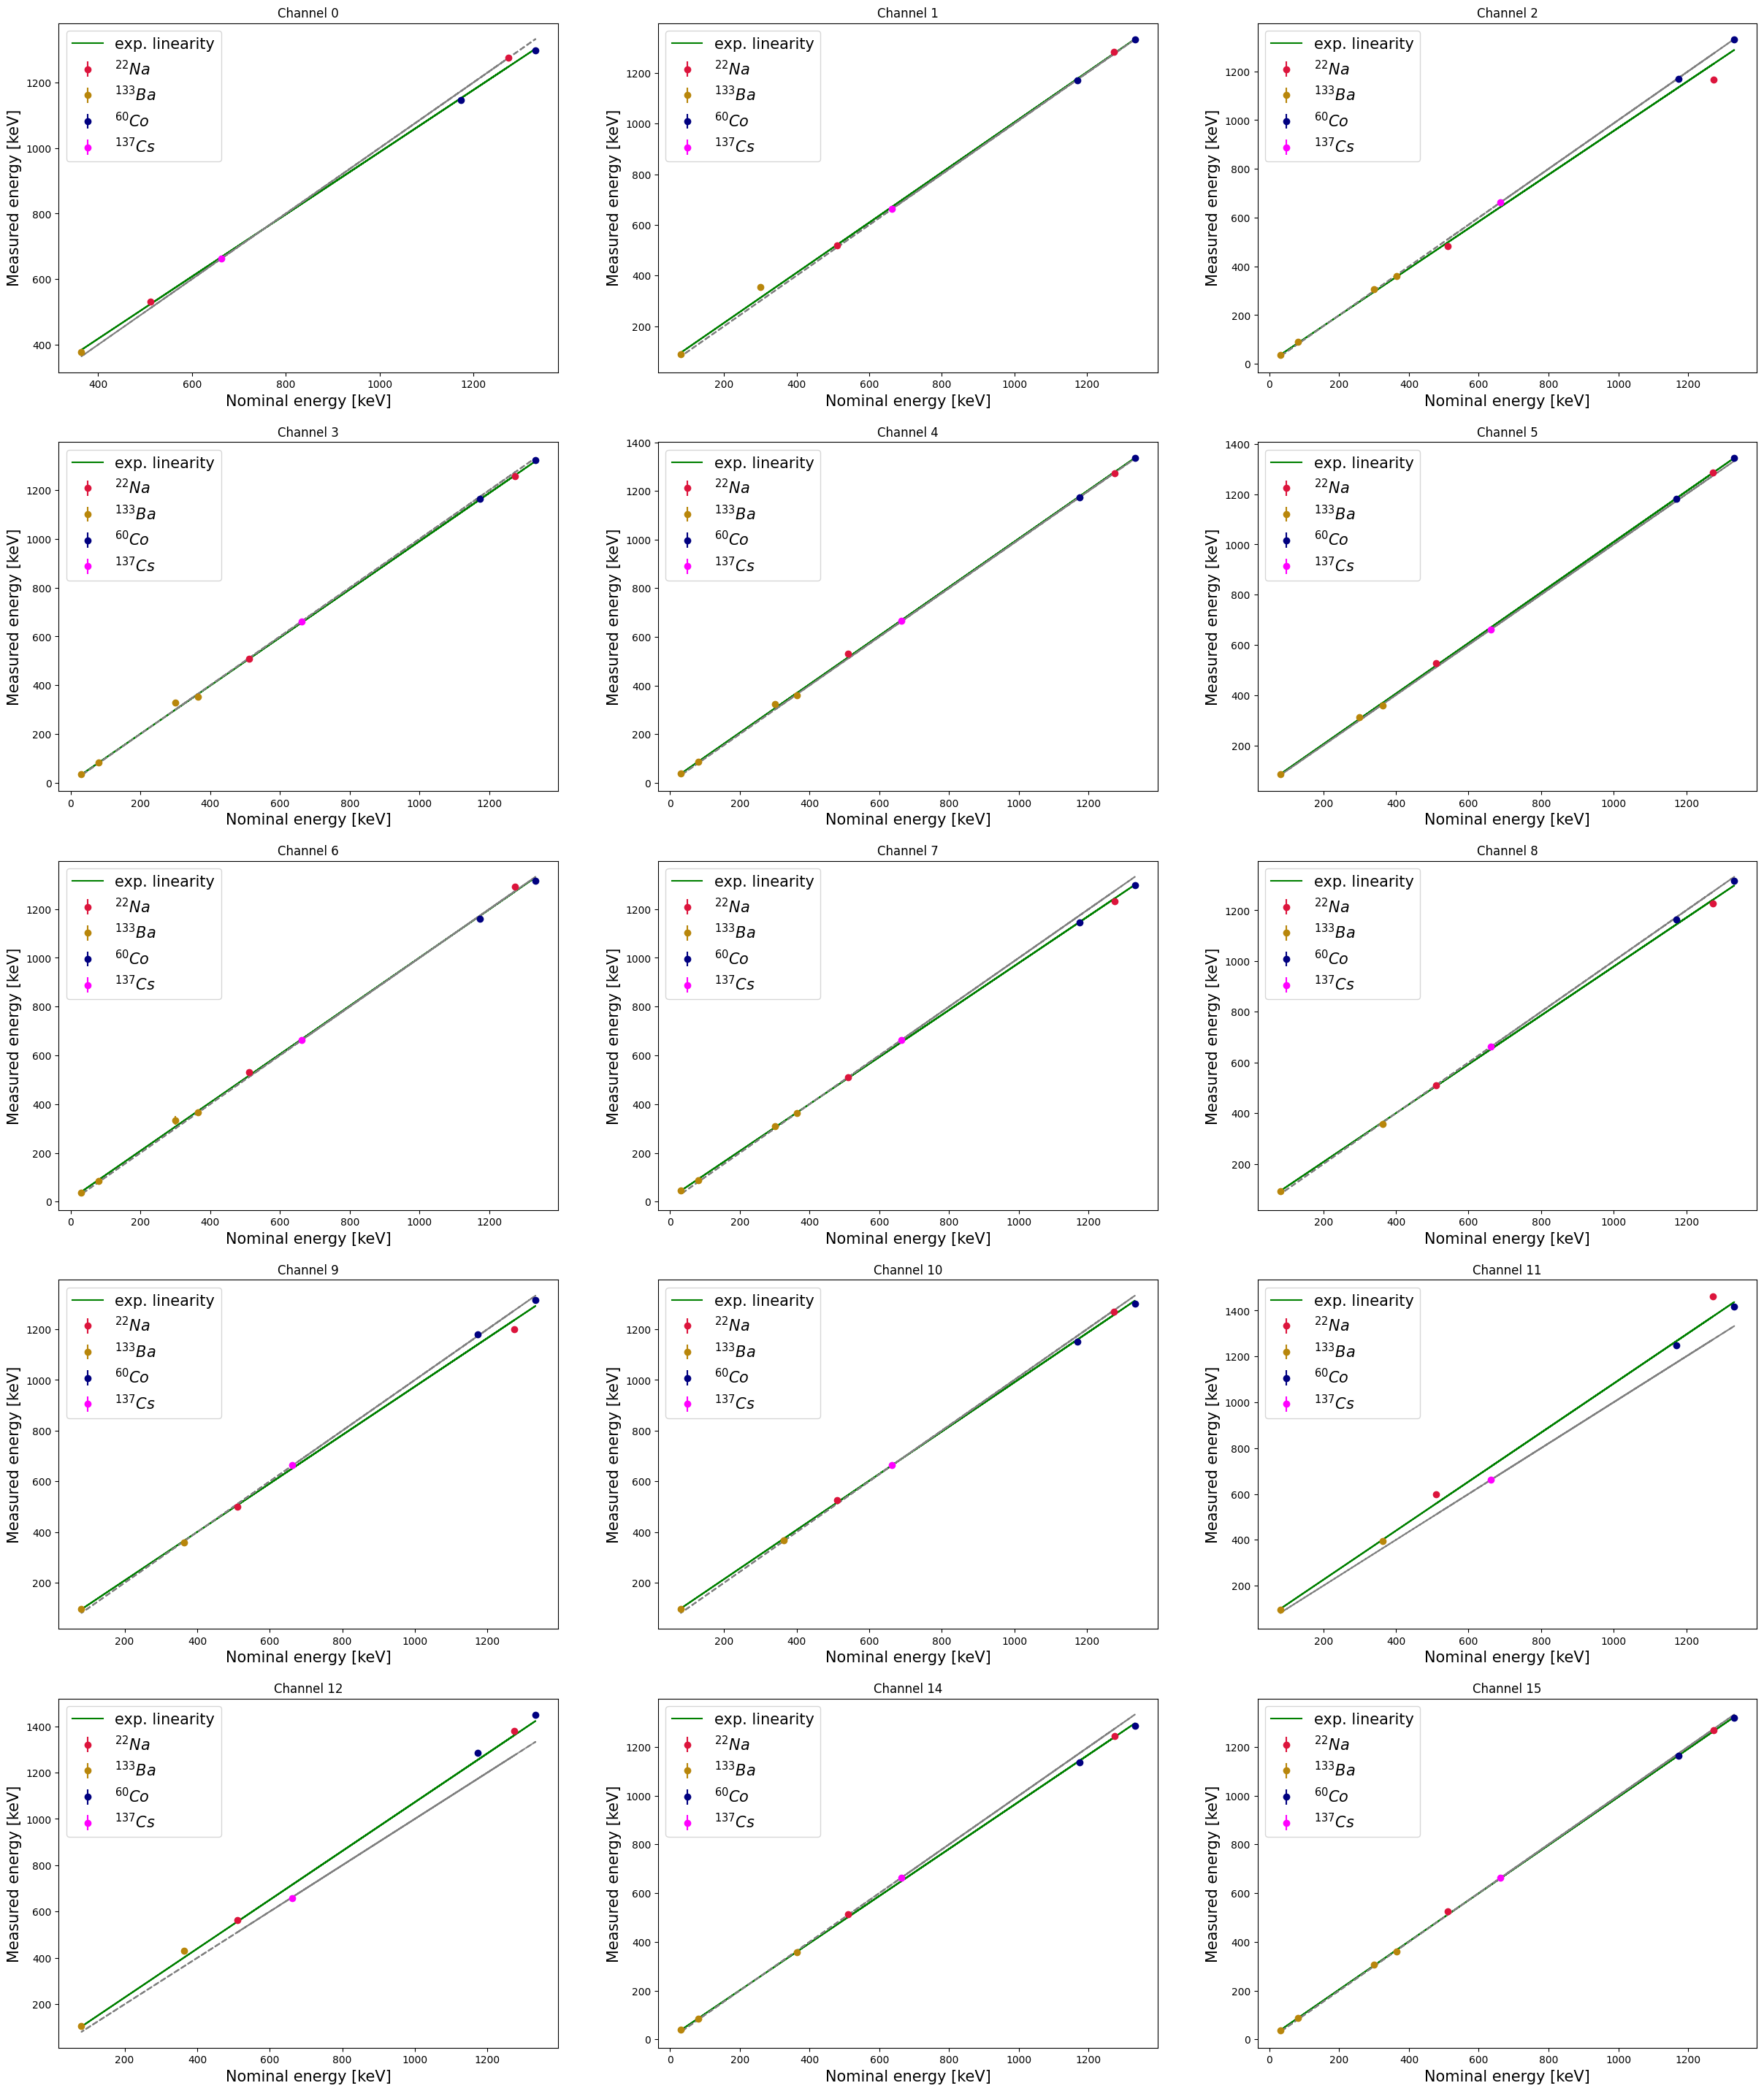

In [17]:
coeff=[]
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 36))#, sharex=True)  #fare graf. grande
a=[]
b=[]
s_a=[]
s_b=[]
# Iterate over each element in channels
print("ch    a     b;      y=ax+b")
for j in lista:
    # Calculate subplot row and column
    row = j // 3
    col = j % 3
    #print(row, col)
    ch="ch_"+str(j)
    # Plot error bars on the corresponding subplot with different color
    par, cov= curve_fit(retta, energy[ch], peaks["ch_"+str(j)], sigma=err["ch_"+str(j)])
    a.append(par[0])
    b.append(par[1])
    s_a.append(np.sqrt(cov[0][0]))
    s_b.append(np.sqrt(cov[1][1]))
    print("{4} & {0} $\pm$ {1} & {2} $\pm$ {3} \\".format(par[0], np.sqrt(cov[0][0]), par[1], np.sqrt(cov[1][1]), j))
    coeff.append(energy["ch_"+str(j)] - retta(energy["ch_"+str(j)], par[0], par[1]))
    if j==14 or j==15:
        row = (j-1) // 3
        col = (j-1) % 3
    axes[row, col].set_title("Channel {}".format(j))
    axes[row, col].errorbar(energy["ch_"+str(j)], energy["ch_"+str(j)], ls='--', color='gray')
    
    axes[row, col].errorbar(energy["ch_"+str(j)][0:2], peaks["ch_"+str(j)][0:2], yerr= err["ch_"+str(j)][0:2],color='crimson', 
                            label='$^{22}Na$', marker='o', linestyle=' ')
    axes[row, col].errorbar(energy["ch_"+str(j)][2:-3], peaks["ch_"+str(j)][2:-3], yerr= err["ch_"+str(j)][2:-3], color='darkgoldenrod', 
                            label='$^{133}Ba$', marker='o', linestyle=' ')
    axes[row, col].errorbar(energy["ch_"+str(j)][-3:-1], peaks["ch_"+str(j)][-3:-1], yerr= err["ch_"+str(j)][-3:-1], color='navy', 
                            label='$^{60}Co$', marker='o', linestyle=' ')
    axes[row, col].errorbar(energy[ch][-1], peaks[ch][-1], yerr=err[ch][-1],color='magenta', 
                            label='$^{137}Cs$', marker='o', linestyle=' ')
    axes[row, col].plot(energy["ch_"+str(j)], retta(energy["ch_"+str(j)], par[0], par[1]), color='green', label='exp. linearity')
    
    axes[row, col].set_xlabel("Nominal energy [keV]", fontsize=15)
    axes[row, col].set_ylabel("Measured energy [keV]", fontsize=15)
    axes[row, col].legend(fontsize=15)  # Add legend for each subplot

plt.savefig("linerity.png")

In [37]:
print(coeff)

[array([-12.39226725,  26.70242776, -19.90392024,  21.53762402,
        29.69985851,  -4.65530926]), array([ -9.99377827,  -1.91795427, -14.54502902, -12.22957494,
        -2.98485212,  -1.29877248,  -8.39554836]), array([12.76820877, 42.28412216, -5.8059273 , -3.86592329,  4.59671063,
        7.09702245, 38.38477214, 44.5471378 , 18.609497  ]), array([ 3.09035526, 12.43079091, -2.78750866, -2.17358619,  1.29568437,
        0.50445011, 11.1968251 , 13.14693178,  4.93885563]), array([-5.04165939, -3.21782715, -6.18938292, -6.06950718, -5.39209044,
       -5.54658843, -3.4587738 , -3.07799205, -4.6807175 ]), array([ -6.7934226 , -11.42625345,  -4.18252186,  -5.90327068,
        -5.51082063, -10.81420974, -11.78145739,  -7.71027379]), array([-5.35472643,  1.74053211, -9.81971777, -9.35336493, -7.31905297,
       -6.7180091 ,  0.80317686,  2.28453293, -3.95055338]), array([  3.52797217,  30.62986475, -13.52703926, -11.74570254,
        -3.97520287,  -1.67938429,  27.04943123,  32.70779491,

In [80]:
print(' ')
print('Test del K-S per il set 2')
#t2=[]
valori=coeff[14]
print(valori)
N=len(valori)
media=np.mean(valori)
sigma=np.std(valori)
t2=(valori-media)/sigma
#for j in range(0,N):
  #t2.append((valori[j] - media)/sigma)
t2=sorted(t2)
print(t2)

 
Test del K-S per il set 2
[-0.48493363  9.03192781 -6.47382095 -5.84830247 -3.11968237 -2.31350298
  7.77465437  9.76159543  1.39848193]
[-1.2665640862659384, -1.1616920653657388, -0.7042221225937567, -0.5690611885337516, -0.262490290947289, 0.053275913557802326, 1.1222804416571384, 1.333070066916142, 1.4554033315753918]


In [81]:
print(N)

9


In [66]:
1/8

0.125

In [67]:
0.143*7

1.001

In [82]:
diff=[]
#cumulata=[0.167, 0.167*2, 0.167*3, 0.167*4, 0.167*5, 1]
#cumulata=[0.143, 0.143*2, 0.143*3, 0.143*4, 0.143*5, 0.143*6, 1]

cumulata=[0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1] #9
#cumulata=[0.125, 0.125*2, 0.125*3, 0.125*4, 0.125*5, 0.125*6, 0.125*7, 1]  #8
#devi metterci i valori che ottieni facendo 1/N e sommandoli
#in t2 devi mettere i valori di t ottenuti con distcalc
#devi mettere 1-alpha di distcalc
t=norm.cdf(t2)
for i in range(0,N):
  diff.append(cumulata[i]-t[i])
print(f'differenza={diff}')
#cerca il valore nella tabella
print(min(diff))
print(max(diff))
#la significatività è superiore al 20%

differenza=[0.0073443996078229185, 0.09731971505268464, 0.08935277195519936, 0.1553426920070496, 0.1535282651409713, 0.13875603556851168, -0.09912839031626308, -0.028745594350728987, 0.07277881731917135]
-0.09912839031626308
0.1553426920070496


In [25]:
print("compatibilità con 1")
a=np.array(a)
s_a=np.array(s_a)
t1=np.abs(a-1)/s_a

b=np.array(b)
s_b=np.array(s_b)
t2=np.abs(b)/s_b
for i, j in enumerate(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,14,15])):
    print('{0} & {1} & {2}'.format(j, t1[i], t2[i]))
print()

compatibilità con 1
0 & 4.311728136237816 & 3.706709053910268
1 & 0.9026532085873666 & 1.688961888403955
2 & 2.7460794411176557 & 2.8381249740804106
3 & 2.8770684114573593 & 1.7110492393411245
4 & 0.3248538028574721 & 2.0149969895929085
5 & 1.072562129477586 & 0.8250971449967092
6 & 0.9515846599176996 & 1.7001216250706932
7 & 7.488431877162226 & 3.8588764779956217
8 & 3.8486844876382538 & 2.3248133558119086
9 & 3.008463054715757 & 3.2135357653728756
10 & 4.324527904338373 & 4.195509474116457
11 & 2.4514904368278407 & 0.7008643198123249
12 & 1.8767897967414329 & 1.164030350491661
14 & 5.222272831266855 & 2.6079576912491818
15 & 1.9987682059537044 & 2.275218583439728



compatibilità con 0
[3.70670905 1.68896189 2.83812497 1.71104924 2.01499699 0.82509714
 1.70012163 3.85887648 2.32481336 3.21353577 4.19550947 0.70086432
 1.16403035 2.60795769 2.27521858]
[1.04984962e-04 4.56133669e-02 2.26897055e-03 4.35360118e-02
 2.19524823e-02 2.04658220e-01 4.45540252e-02 5.69547447e-05
 1.00409713e-02 6.55557340e-04 1.36129453e-05 2.41693847e-01
 1.22205856e-01 4.55421058e-03 1.14464103e-02]


In [16]:
print(s_a)

[0.94876187 0.9894157  0.96131597 0.98775828 0.99760966 1.00607186
 0.99070084 0.96447983 0.96302958 0.95610775 0.96987881 1.06949198
 1.05384477 0.966997   0.98752705]


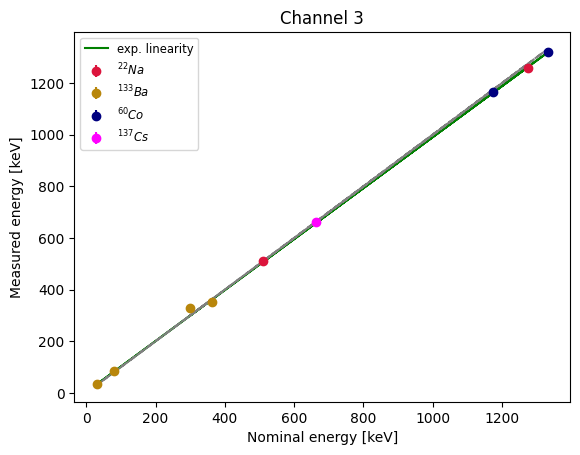

In [14]:

j=3
ch="ch_"+str(j)
par, cov= curve_fit(retta, energy[ch], peaks["ch_"+str(j)], sigma=err["ch_"+str(j)])
plt.title("Channel {}".format(j))
plt.errorbar(energy["ch_"+str(j)], energy["ch_"+str(j)], ls='--', color='gray')
    
plt.errorbar(energy["ch_"+str(j)][0:2], peaks["ch_"+str(j)][0:2], yerr= err["ch_"+str(j)][0:2],color='crimson', 
                            label='$^{22}Na$', marker='o', linestyle=' ')
plt.errorbar(energy["ch_"+str(j)][2:-3], peaks["ch_"+str(j)][2:-3], yerr= err["ch_"+str(j)][2:-3], color='darkgoldenrod', 
                            label='$^{133}Ba$', marker='o', linestyle=' ')
plt.errorbar(energy["ch_"+str(j)][-3:-1], peaks["ch_"+str(j)][-3:-1], yerr= err["ch_"+str(j)][-3:-1], color='navy', 
                            label='$^{60}Co$', marker='o', linestyle=' ')
plt.errorbar(energy[ch][-1], peaks[ch][-1], yerr=err[ch][-1],color='magenta', 
                            label='$^{137}Cs$', marker='o', linestyle=' ')
plt.plot(energy["ch_"+str(j)], retta(energy["ch_"+str(j)], par[0], par[1]), color='green', label='exp. linearity')
    
plt.xlabel("Nominal energy [keV]")
plt.ylabel("Measured energy [keV]")
plt.legend(fontsize='small')  # Add legend for each subplot
plt.savefig('ch3.png')